In [1]:
import numpy as np
from scipy.optimize import minimize
from IPython.display import clear_output
import time
from tqdm import tqdm
import matplotlib.pyplot as plt

rc = {"font.family" : "Times New Roman", 
      "mathtext.fontset" : "cm"}
plt.rcParams.update(rc)

from QAOA import *
from hamiltonians import *
from heuristics import *
from visualization import *
from analysis import *
from expressibility import*

import warnings
warnings.filterwarnings("ignore")

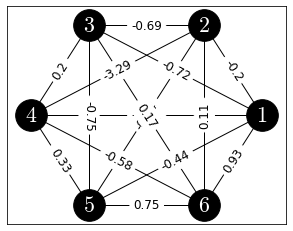

Ground state: -3.507835060471441
Energy gap: 1.1300933217441242
Max excited state energy: 2.972182276512776


In [2]:
# number of qubits
n = 6
n_edges = n*(n-1)//2

index = 8

# ions chain parameters
nu_rad = 1e6
nu_ax = 0.15e6
mu = 2*np.pi*(nu_rad + 10e3) # in Hz
Omega_max = 2*np.pi*30e3     # in Hz

coupling_mat = radial_coupling_matrix(n, nu_rad, nu_ax, mu, Omega_max) # in kHz


# read data from simulations
path = f'data/{n}q/'
fname = path+f'{n}q_ev_{index}.txt'

weights = list(np.genfromtxt(fname,skip_header=1,skip_footer=1))

G = get_weighted_graph(n,list(np.round(weights,2)))
pos = nx.circular_layout(G)

draw_graph(G, pos)

H2 = get_hamiltonian(n,weights)
gs = np.min(H2)
emax = np.max(H2)

spectrum = np.unique(np.sort(H2))

gap = spectrum[1] - spectrum[0]
print("Ground state:", gs)
print("Energy gap:", gap)
print("Max excited state energy:", emax)

In [3]:
# simulation parameters

p_max = 10 # max number of layers
n_bins = 100 # number of bins in the fidelities distribution histogram 
n_samples = 10**5 # number of sampled fidelities
path = 'example_data/'
np.random.seed(1111)

# problem-specific ansatz hyperparameters
A = np.genfromtxt(fname,skip_header=2)

In [9]:
fname = 'fidelities_trained'

generate_fidelities_data(n,p_max,n_samples,A,coupling_mat,fname,path)

In [10]:
A_asym = np.ones(n)
A_asym[0] = -0.3

fname = 'fidelities_asym'

generate_fidelities_data(n,p_max,n_samples,A_asym,coupling_mat,fname,path)

In [4]:
fname = 'fidelities_trained'
L, expr = get_layerwise_expressibility(path,fname,p_max,n,n_bins)
fname = 'fidelities_asym'
L, expr_asym = get_layerwise_expressibility(path,fname,p_max,n,n_bins)

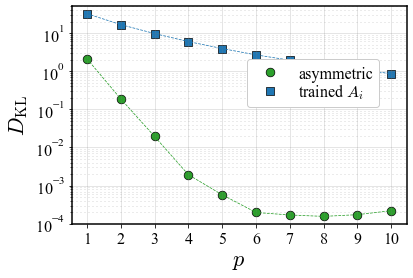

In [5]:
labels = ['asymmetric', 'trained $A_i$']
markers = ['o', 's']
colors = ['tab:green', 'tab:blue']

expr_sets = [expr_asym, expr]

plot_expr(L,expr_sets,labels,markers,colors,ymax=50.0)